## Libraries Import

In [1]:
import sys
sys.version

'3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:34:57) [MSC v.1936 64 bit (AMD64)]'

In [2]:
import tensorflow as tf

# Get the list of physical devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU is available.")
    # Additional information about the GPU devices
    for device in physical_devices:
        print(f"  - Device Name: {device.name}")
        print(f"    Device Type: {device.device_type}")
else:
    print("No GPU is available.")


No GPU is available.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import warnings 
warnings.filterwarnings('ignore')

C:\Users\emage\anaconda3\envs\dlvenvs10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [4]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

## Data Inspection

In [5]:
#
for data in dataset[0].take(1):
  print(data)
  break

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


## Train Test Val Dataset Split

In [6]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))

dataset_size = len(dataset)

train_dataset = dataset.take(int(train_ratio * dataset_size))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
val_dataset = val_test_dataset.take(int(val_ratio * dataset_size))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


In [7]:
# Defining the Function to split the data into train-val-test set
def split(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(train_ratio * dataset_size))

  val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
  val_dataset = val_test_dataset.take(int(val_ratio * dataset_size))

  test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))

  return train_dataset, val_dataset, test_dataset


# Calling the Function
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = split(dataset, train_ratio, val_ratio, test_ratio)


# Print Output
list(train_dataset.as_numpy_iterator()), list(val_dataset.as_numpy_iterator()), list(test_dataset.as_numpy_iterator())

([0, 1, 2, 3, 4, 5], [6, 7], [8, 9])

### Spliting Malaria Dataset

In [8]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

In [9]:
# Calling the Function
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_dataset, val_dataset, test_dataset = split(dataset[0], train_ratio, val_ratio, test_ratio)

# Print Output
list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator())

([(array([[[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          ...,
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]]], dtype=uint8),
   0)],
 [(array([[[0, 0, 0],
           [0, 0, 0],


## Dataset Visualisation

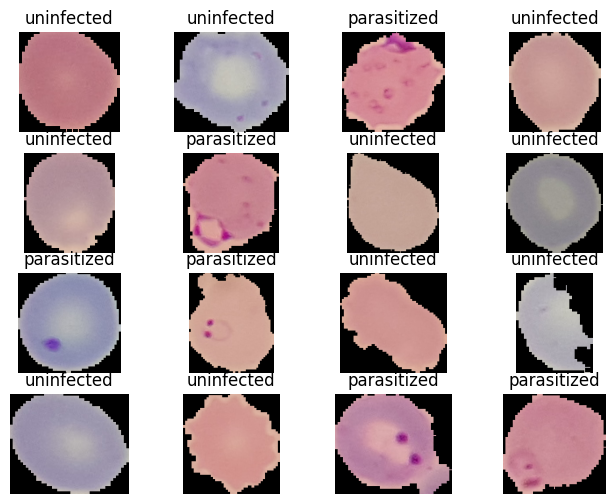

In [10]:
plt.figure(figsize=(8,6))

for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [11]:
dataset_info.features['label'].int2str(1)

'uninfected'

## Data Preprocessing

In [12]:
# Convertin the image size of 102x102 to a fixed size of 224x224
# Defining funcction to do so
im_size = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (im_size, im_size))/255.0, label

In [13]:
# Applying the conversion to all train dataset
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

train_dataset, val_dataset, test_dataset

(<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [14]:
# Varify the conversion
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [15]:
# Suffeling the training dataset
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=8,
                                      reshuffle_each_iteration=True,
                                      ).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8,
                                      reshuffle_each_iteration=True,
                                      ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

## Model

In [16]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape=(im_size, im_size, 3)),
    Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='sigmoid'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='sigmoid'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    Dense(100, activation='sigmoid'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (Batch  (None, 220, 220, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Bat  (None, 106, 106, 16)      64        
 chNormalization)                                                
                                                        

## Binary Crossentropy

In [17]:
# The difference between True and Pred = bce
y_true = [0, ]
y_pred = [0.001, ]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.69364727>

In [18]:
# Model Compiler
lenet_model.compile(optimizer=Adam(learning_rate=0.1),
              loss = BinaryCrossentropy(),
              metrics='accuracy'
              )

In [19]:
history = lenet_model.fit(train_dataset, validation_data = val_dataset, epochs=10, verbose=1)

Epoch 1/10



689/689 [==============================] - 248s 357ms/step - loss: 0.6977 - accuracy: 0.5052 - val_loss: 0.7464 - val_accuracy: 0.5067
Epoch 2/10
689/689 [==============================] - 254s 369ms/step - loss: 0.6964 - accuracy: 0.4968 - val_loss: 0.6964 - val_accuracy: 0.4962
Epoch 3/10
689/689 [==============================] - 251s 364ms/step - loss: 0.6983 - accuracy: 0.5003 - val_loss: 0.6937 - val_accuracy: 0.4951
Epoch 4/10
689/689 [==============================] - 243s 353ms/step - loss: 0.6967 - accuracy: 0.4979 - val_loss: 0.6933 - val_accuracy: 0.4984
Epoch 5/10
689/689 [==============================] - 246s 357ms/step - loss: 0.6972 - accuracy: 0.4974 - val_loss: 0.7502 - val_accuracy: 0.4944
Epoch 6/10
689/689 [==============================] - 247s 359ms/step - loss: 0.6974 - accuracy: 0.4970 - val_loss: 0.6949 - val_accuracy: 0.4940
Epoch 7/10
689/689 [==============================] - 241s 349ms/step - loss: 0.6972 - accuracy: 0.4977 - val_loss: 0.6937 - val_accura

## Plot Performance Result

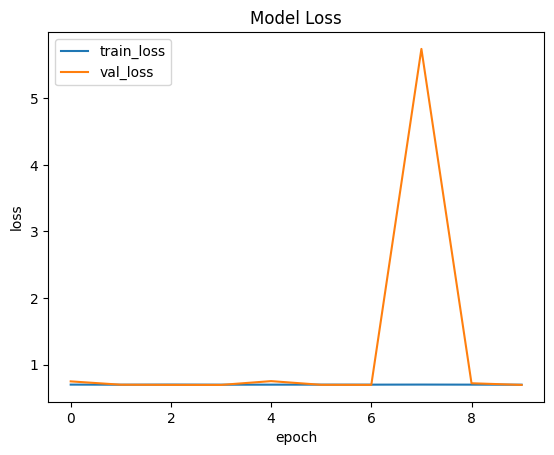

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss']);

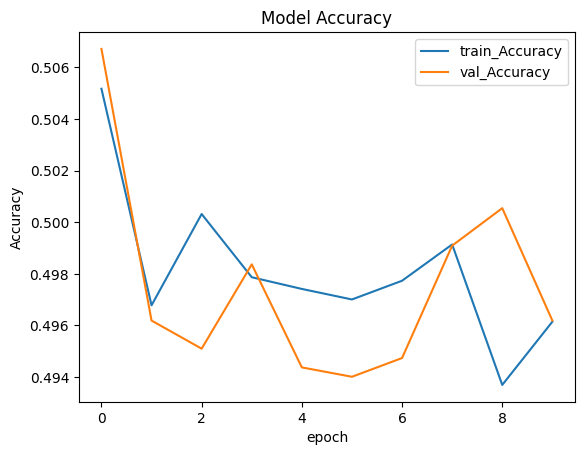

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_Accuracy', 'val_Accuracy']);

## Model Evaluation

In [22]:
# shape of train : shape=(None, 224, 224, 3)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [23]:
# To add None in shape of test_dataset
test_dataset = test_dataset.batch(1)
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [24]:
lenet_model.evaluate(test_dataset)

2757/2757 [==============================] - 21s 7ms/step - loss: 0.6931 - accuracy: 0.5049


[0.6931154727935791, 0.5048966407775879]

## Model Prediction

In [29]:
lenet_model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 2s 2s/step


0.49872023

#### Define Parasite or Not

In [32]:
# If Predction confidence is < 0.5 meand infected
def parasite_or_not(x):
    if(x<0.5):
        return str('P')
    else:
        return str('U')

parasite_or_not(lenet_model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 2s 2s/step


'P'

1/1 [==============================] - 0s 27ms/step


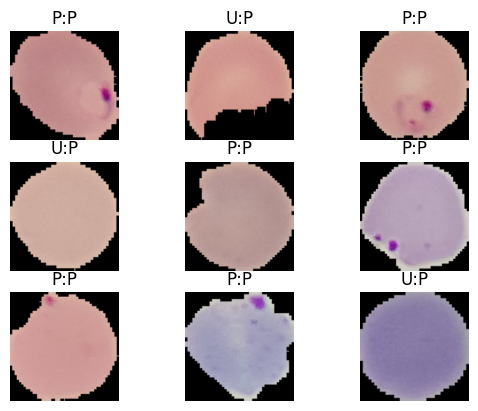

In [34]:
# Ploting the classification
for i, (image, label) in enumerate(test_dataset.take(9)):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))
    plt.axis('off')

PP/UU = correct
UP/PU = incorrct